In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('E_Commerce_Data_Set.csv')
df.head()

,Genre,Age,Annual_Income (£K),Spending_Score
0,Male,24.0,62.0,13.0
1,Male,52.0,59.0,35.0
2,Female,42.0,31.0,12.0
3,Female,20.0,92.0,41.0
4,Female,30.0,52.0,40.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Genre               800 non-null    object 
 1   Age                 775 non-null    float64
 2   Annual_Income (£K)  781 non-null    float64
 3   Spending_Score      785 non-null    float64
dtypes: float64(3), object(1)
memory usage: 25.1+ KB


In [ ]:
df.isnull().sum()

,0
Genre,0
Age,25
Annual_Income (£K),19
Spending_Score,15


In [ ]:
df.describe(include='all')

,Genre,Age,Annual_Income (£K),Spending_Score
count,800,775.000000,781.000000,785.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,448,NaN,NaN,NaN
mean,NaN,42.452903,68.288092,31.433121
std,NaN,14.266838,29.571343,18.087046
min,NaN,18.000000,17.000000,1.000000
25%,NaN,29.000000,43.000000,15.000000
50%,NaN,43.000000,67.000000,32.000000
75%,NaN,55.000000,93.000000,46.000000


In [ ]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Annual_Income (£K)'].fillna(df['Annual_Income (£K)'].median(),inplace=True)
df['Spending_Score'].fillna(df['Spending_Score'].median(),inplace=True)
df.head()

<ipython-input-5-87d03752ce52>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)
<ipython-input-5-87d03752ce52>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

,Genre,Age,Annual_Income (£K),Spending_Score
0,Male,24.0,62.0,13.0
1,Male,52.0,59.0,35.0
2,Female,42.0,31.0,12.0
3,Female,20.0,92.0,41.0
4,Female,30.0,52.0,40.0


In [ ]:
df.isnull().sum()

,0
Genre,0
Age,0
Annual_Income (£K),0
Spending_Score,0


In [ ]:
df.isnull().sum()

,0
Genre,0
Age,0
Annual_Income (£K),0
Spending_Score,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Genre']=le.fit_transform(df['Genre'])



In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Genre']=le.fit_transform(df['Genre'])
df.head()

,Genre,Age,Annual_Income (£K),Spending_Score
0,1,24.0,62.0,13.0
1,1,52.0,59.0,35.0
2,0,42.0,31.0,12.0
3,0,20.0,92.0,41.0
4,0,30.0,52.0,40.0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Age', 'Annual_Income (£K)', 'Spending_Score']])
scaled_df = pd.DataFrame(scaled_features, columns=['Age', 'Annual_Income (£K)', 'Spending_Score'])
scaled_df['Genre'] = df['Genre'].values
scaled_df1=scaled_df.copy()
scaled_df2=scaled_df.copy()
scaled_df3=scaled_df.copy()
scaled_df.head()


,Age,Annual_Income (£K),Spending_Score,Genre
0,-1.316145,-0.214298,-1.030065,1
1,0.679094,-0.317037,0.198613,1
2,-0.033492,-1.275941,-1.085914,0
3,-1.601179,0.813099,0.533707,0
4,-0.888594,-0.556763,0.477858,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

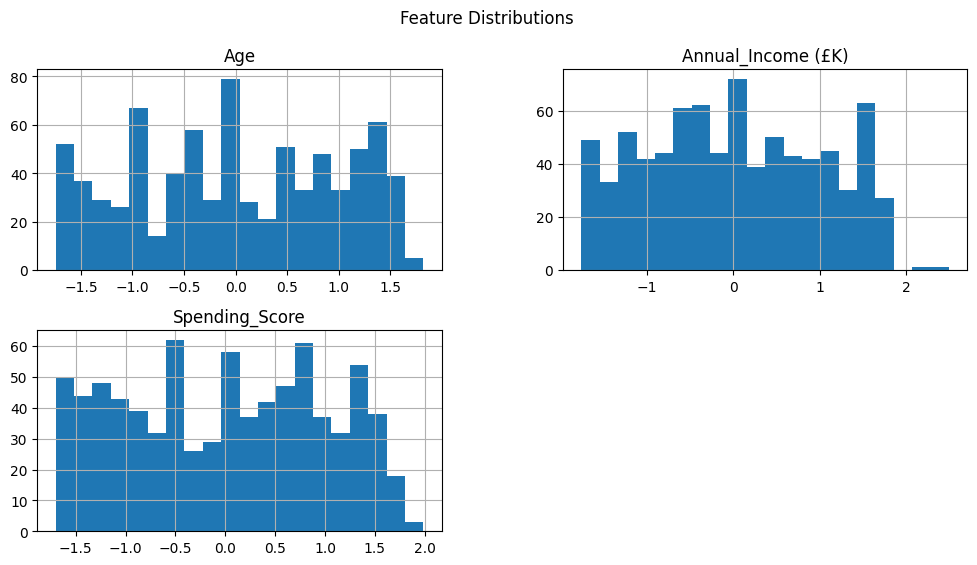

In [ ]:
scaled_df[['Age', 'Annual_Income (£K)', 'Spending_Score']].hist(bins=20, figsize=(12,6))
plt.suptitle('Feature Distributions')
plt.show()

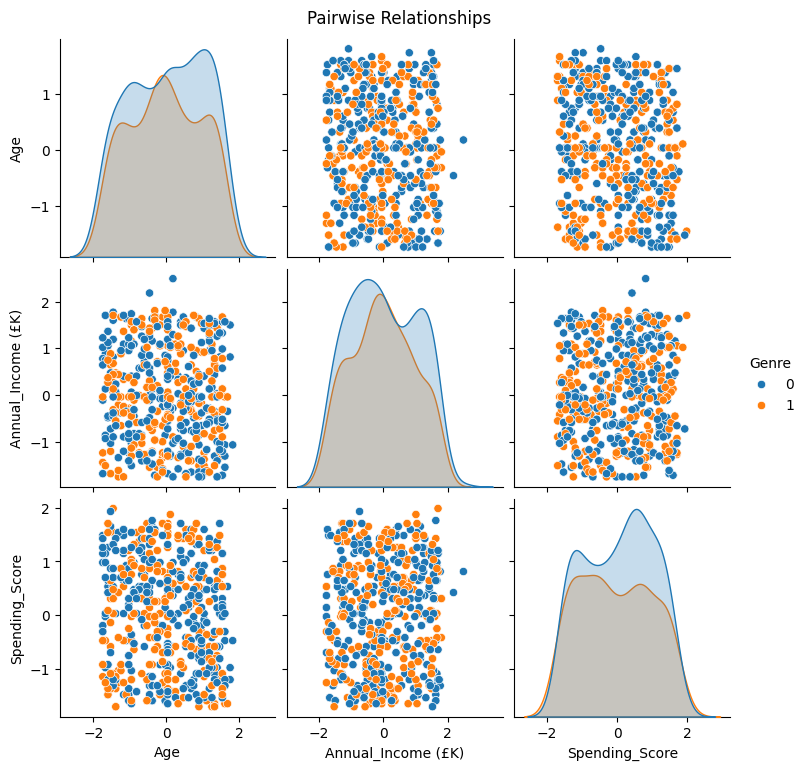

In [ ]:
sns.pairplot(scaled_df, hue='Genre', diag_kind='kde')
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

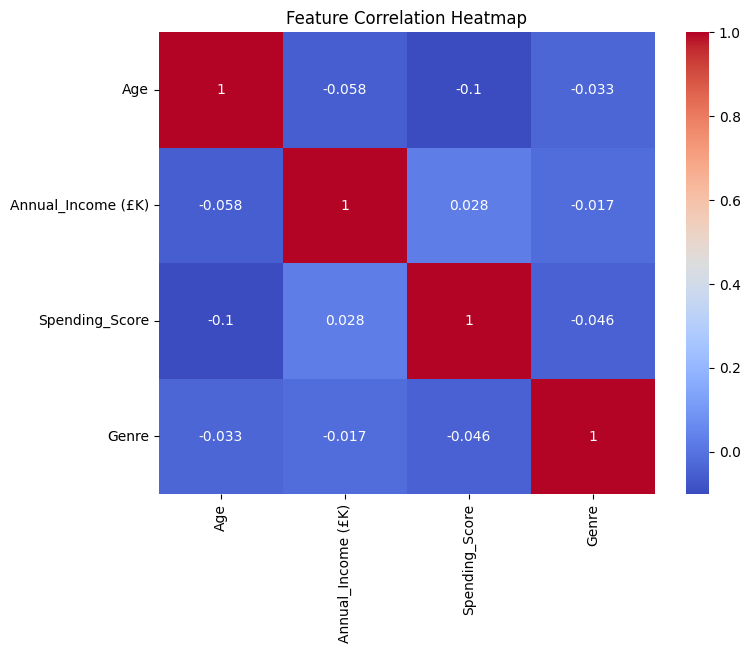

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(scaled_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

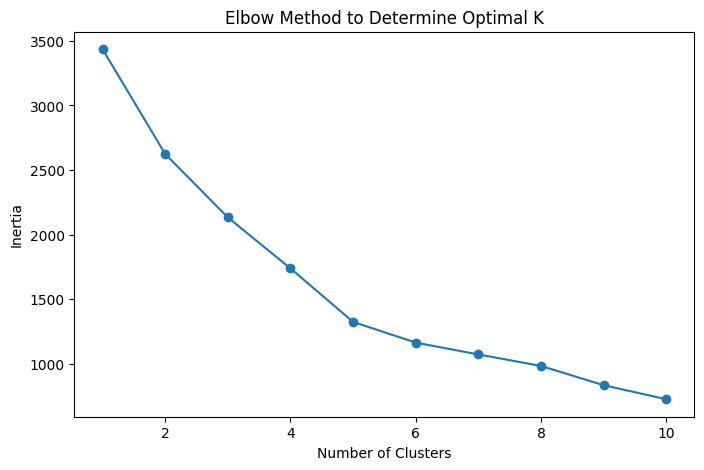

In [ ]:
from sklearn.cluster import KMeans

inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df1)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal K')
plt.show()

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df1)
scaled_df1['KMeans_Cluster'] = kmeans_labels
scaled_df1.to_csv("kmeans4.csv", index=False)



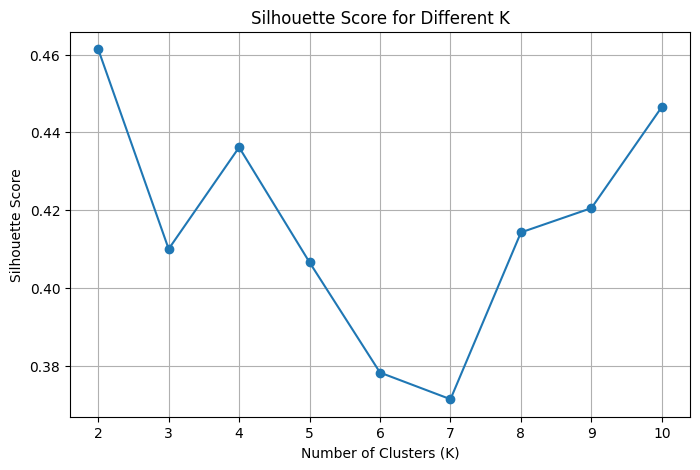

Best Silhouette Score: 0.461 with K = 2


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df1)
    labels = kmeans.labels_
    score = silhouette_score(scaled_df1, labels)
    scores.append(score)

plt.figure(figsize=(8,5))
plt.plot(k_range, scores, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different K")
plt.grid(True)
plt.show()
best_score = max(scores)
best_k = k_range[scores.index(best_score)]

print(f"Best Silhouette Score: {best_score:.3f} with K = {best_k}")

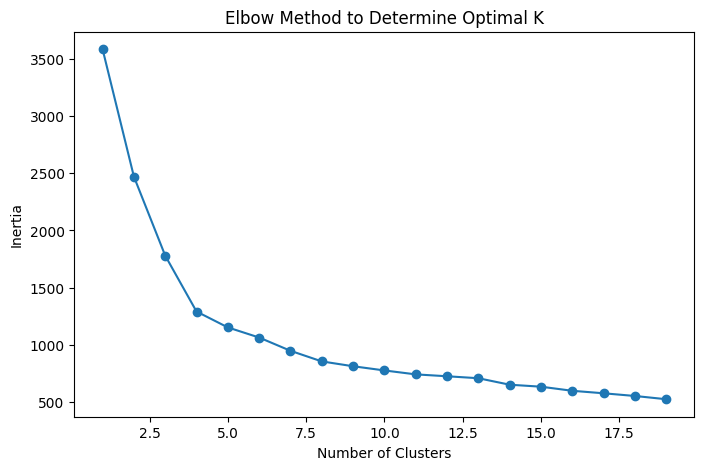

In [ ]:
inertia = []
k_range = range(1, 20)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df1)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal K')
plt.show()

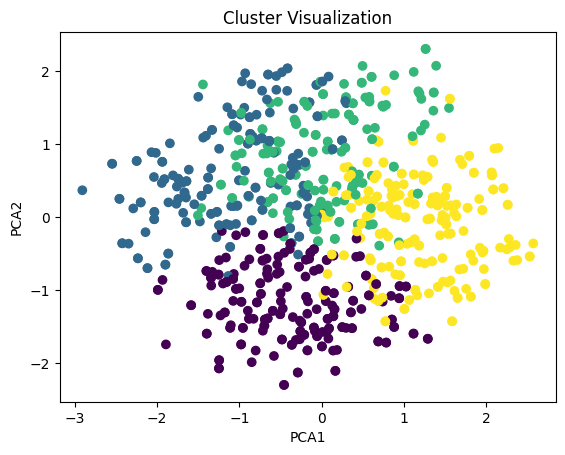

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_df1.drop('KMeans_Cluster', axis=1))

plt.scatter(pca_components[:, 0], pca_components[:, 1], c=scaled_df1['KMeans_Cluster'], cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Cluster Visualization')
plt.show()

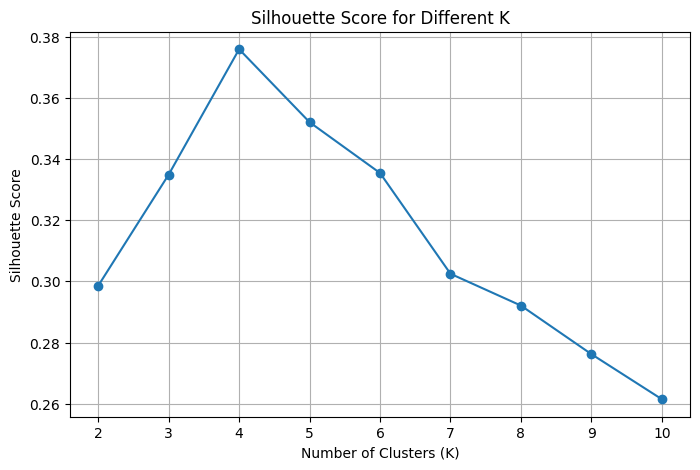

In [ ]:
scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df1)
    labels = kmeans.labels_
    score = silhouette_score(scaled_df1, labels)
    scores.append(score)

plt.figure(figsize=(8,5))
plt.plot(k_range, scores, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different K")
plt.grid(True)
plt.show()

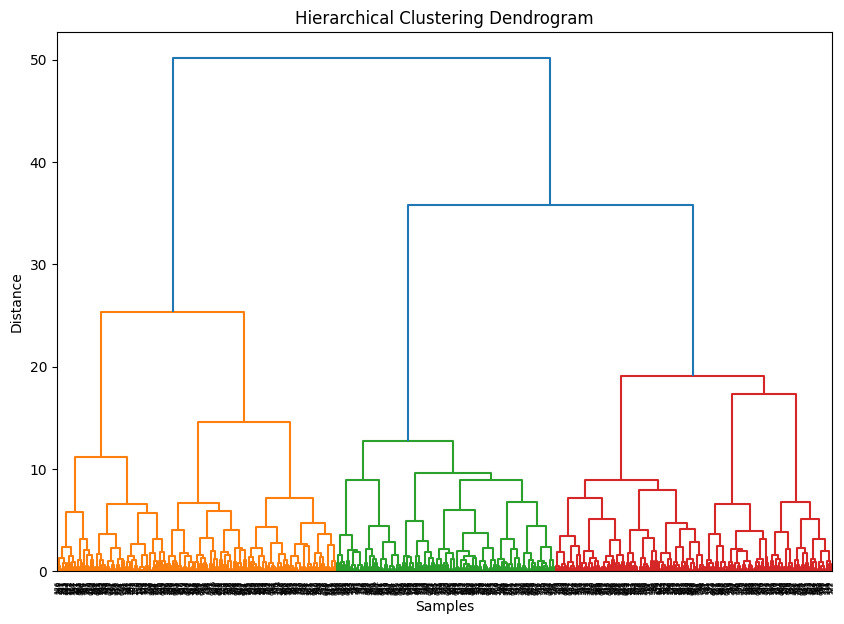

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt


linked = linkage(scaled_df2, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

fcluster_labels = fcluster(linked, t=4, criterion='maxclust')

scaled_df2['HC_Cluster'] = fcluster_labels
scaled_df2.to_csv("hierarchy.csv", index=False)



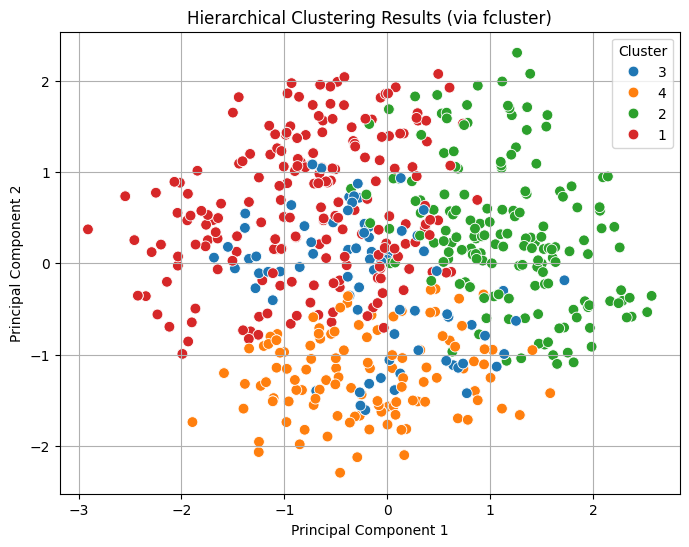

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_df2.drop('HC_Cluster', axis=1))

pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = scaled_df2['HC_Cluster'].astype(str)

plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='tab10', s=60)
plt.title('Hierarchical Clustering Results (via fcluster)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


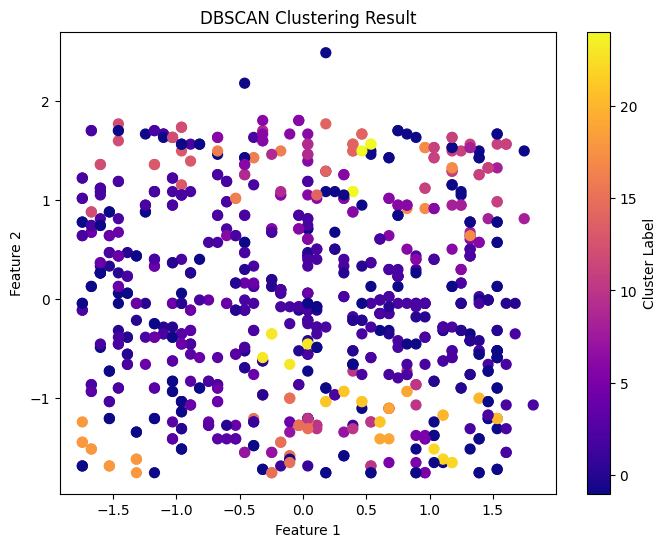

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt


dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_df3)
scaled_df3['DBSCAN_Cluster'] = dbscan_labels
scaled_df3.to_csv("dbscan.csv", index=False)


plt.figure(figsize=(8, 6))
plt.scatter(scaled_df3.iloc[:, 0], scaled_df3.iloc[:, 1], c=scaled_df3['DBSCAN_Cluster'], cmap='plasma', s=50)

plt.title('DBSCAN Clustering Result')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()


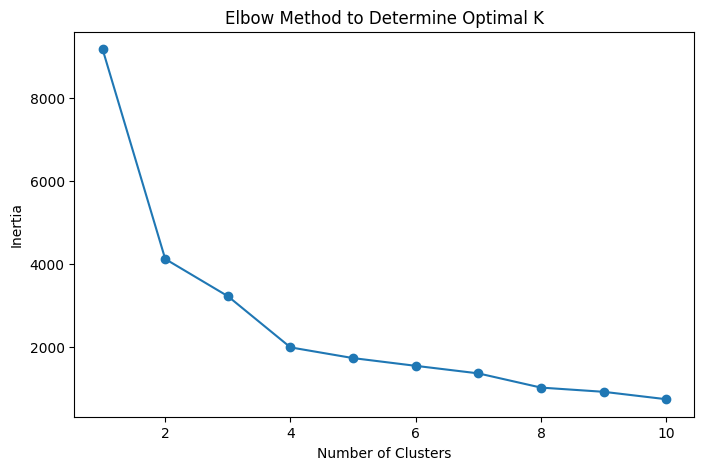

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df1)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal K')
plt.show()


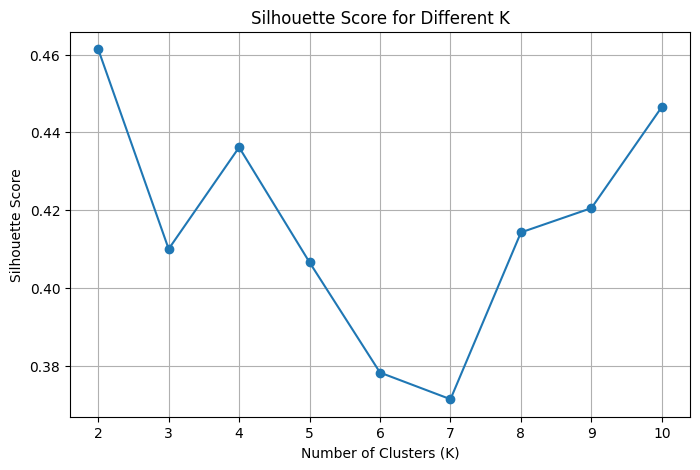

Best Silhouette Score: 0.461 with K = 2


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

scores = []

k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df1)
    labels = kmeans.labels_
    score = silhouette_score(scaled_df1, labels)
    scores.append(score)

plt.figure(figsize=(8,5))
plt.plot(k_range, scores, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different K")
plt.grid(True)
plt.show()

best_score = max(scores)
best_k = k_range[scores.index(best_score)]
print(f"Best Silhouette Score: {best_score:.3f} with K = {best_k}")


NameError: name 'THRESHOLD' is not defined

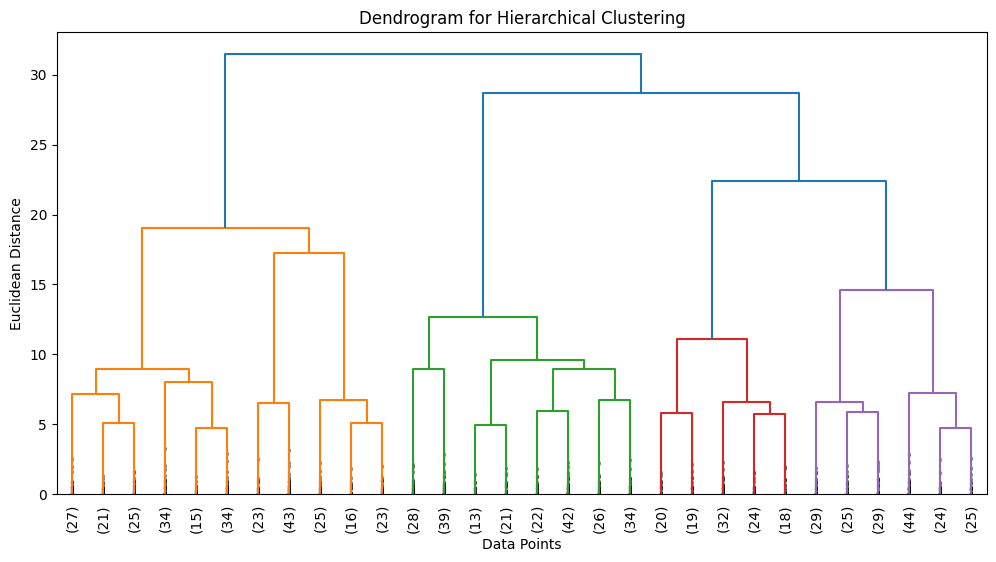

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

linked = linkage(scaled_df2, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10., show_contracted=True)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.axhline(y=THRESHOLD, color='r', linestyle='--')
plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering

n_clusters = 4

hc = AgglomerativeClustering(n_clusters=4, linkage='ward')
labels = hc.fit_predict(scaled_df2)

scaled_df2['Hierarchical_Cluster'] = labels


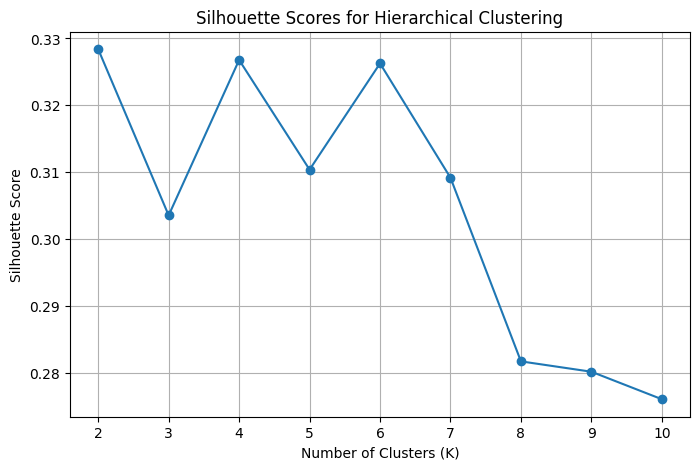

Best Silhouette Score: 0.328 with K = 2


In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    hc = AgglomerativeClustering(n_clusters=k,  linkage='ward')
    labels = hc.fit_predict(scaled_df2)
    score = silhouette_score(scaled_df2, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Hierarchical Clustering")
plt.grid(True)
plt.show()

best_score = max(silhouette_scores)
best_k = k_range[silhouette_scores.index(best_score)]
print(f"Best Silhouette Score: {best_score:.3f} with K = {best_k}")


In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
db_labels = dbscan.fit_predict(scaled_df3)

scaled_df3['DBSCAN_Cluster'] = db_labels



In [ ]:
import numpy as np

labels = db_labels

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f" clusters:{n_clusters}")
print(f"noises : {n_noise}")


 clusters:26
noises : 174


In [ ]:
from sklearn.metrics import silhouette_score

if n_clusters > 1:
    score = silhouette_score(scaled_df3, labels)
    print(f"Silhouette Score: {score:.3f}")
else:
    print("there is not enough cluster to calculate silhouette.")


Silhouette Score: 0.296


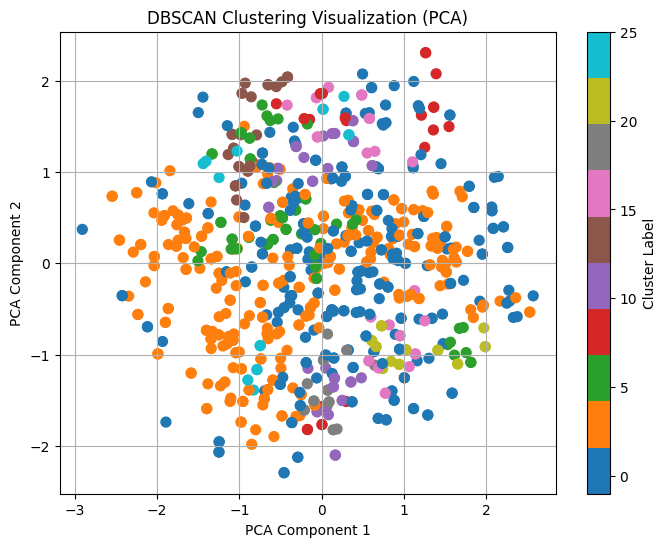

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
components = pca.fit_transform(scaled_df3.drop('DBSCAN_Cluster', axis=1))

plt.figure(figsize=(8, 6))
plt.scatter(components[:, 0], components[:, 1], c=labels, cmap='tab10', s=50)
plt.title('DBSCAN Clustering Visualization (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.7, min_samples=5, metric='euclidean')
db_labels = dbscan.fit_predict(scaled_df3)

scaled_df3['DBSCAN_Cluster'] = db_labels
import numpy as np

labels = db_labels

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f" clusters:{n_clusters}")
print(f"noises : {n_noise}")

 clusters:40
noises : 59


In [ ]:
from sklearn.metrics import silhouette_score

if n_clusters > 1:
    score = silhouette_score(scaled_df3, labels)
    print(f"Silhouette Score: {score:.3f}")
else:
    print("there is not enough cluster to calculate silhouette.")

Silhouette Score: 0.383


In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples=5, metric='euclidean')
db_labels = dbscan.fit_predict(scaled_df3)

scaled_df3['DBSCAN_Cluster'] = db_labels
import numpy as np

labels = db_labels

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f" clusters:{n_clusters}")
print(f"noises : {n_noise}")

 clusters:24
noises : 644


In [ ]:
from sklearn.metrics import silhouette_score

if n_clusters > 1:
    score = silhouette_score(scaled_df3, labels)
    print(f"Silhouette Score: {score:.3f}")
else:
    print("there is not enough cluster to calculate silhouette.")

Silhouette Score: 0.196


In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1, min_samples=5, metric='euclidean')
db_labels = dbscan.fit_predict(scaled_df3)

scaled_df3['DBSCAN_Cluster'] = db_labels
import numpy as np

labels = db_labels

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f" clusters:{n_clusters}")
print(f"noises : {n_noise}")

 clusters:2
noises : 1


In [ ]:
from sklearn.metrics import silhouette_score

if n_clusters > 1:
    score = silhouette_score(scaled_df3, labels)
    print(f"Silhouette Score: {score:.3f}")
else:
    print("there is not enough cluster to calculate silhouette.")

Silhouette Score: 0.145


In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=7, metric='euclidean')
db_labels = dbscan.fit_predict(scaled_df3)

scaled_df3['DBSCAN_Cluster'] = db_labels
import numpy as np

labels = db_labels

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f" clusters:{n_clusters}")
print(f"noises : {n_noise}")

 clusters:3
noises : 7


In [ ]:
from sklearn.metrics import silhouette_score

if n_clusters > 1:
    score = silhouette_score(scaled_df3, labels)
    print(f"Silhouette Score: {score:.3f}")
else:
    print("there is not enough cluster to calculate silhouette.")

Silhouette Score: 0.140


In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=7, metric='euclidean')
db_labels = dbscan.fit_predict(scaled_df3)

scaled_df3['DBSCAN_Cluster'] = db_labels
import numpy as np

labels = db_labels

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f" clusters:{n_clusters}")
print(f"noises : {n_noise}")

 clusters:3
noises : 7


In [ ]:
from sklearn.metrics import silhouette_score

if n_clusters > 1:
    score = silhouette_score(scaled_df3, labels)
    print(f"Silhouette Score: {score:.3f}")
else:
    print("there is not enough cluster to calculate silhouette.")

Silhouette Score: 0.140
